In [1]:
#IMPORTING useful LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [86]:
#IMPORTING OUR DATA SET
df=pd.read_csv(r'C:/Users/ADMIN/Downloads/OnlineRetail (3).csv',encoding='latin')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# .............................................DATA-PREPROCESSING.................................

In [3]:
#CHECKING NULL VALUES IN THE DATA SET
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [4]:
# as we can see we are having only 0.2% of null values for description column in our dataset which is very minute so we can drop these null 
#values but for our customer_id column the amount of null values are high so we cannot drop it we will use some other approach for this.
df.dropna(subset=['Description'],inplace=True)

In [5]:
# we can see our null values are dropped from our description column
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.724723
Country         0.000000
dtype: float64

In [6]:
df[df.duplicated('CustomerID')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
#as we can see our dataset and also our customer id having high no of duplicated values so we can drop it
df.dropna(subset=['CustomerID'],inplace=True)

In [8]:
# as we can see now we just dropped all the missing values
df.isnull().mean()*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [9]:
#now this is the shape our data
df.shape

(406829, 8)

In [87]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [89]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


# 2. Analyze the sales performance of this company, and provide your insights regarding the same

In [10]:
df['total_sale']=df['Quantity']*df['UnitPrice']

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# EXPLORATORY DATA ANALYSIS.........

In [12]:
# GROUPING BY DATA OF TOTAL SALES WITH RESPRCT TO COUNBTRY
country_price=df.groupby('Country')['total_sale'].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [13]:
#AS WE CAN SEE ABOVE DIFFRENT COUNTRIES HAVING DIFFRENT NO OF SALES IN DESCENDING ORDER

<AxesSubplot:xlabel='Country'>

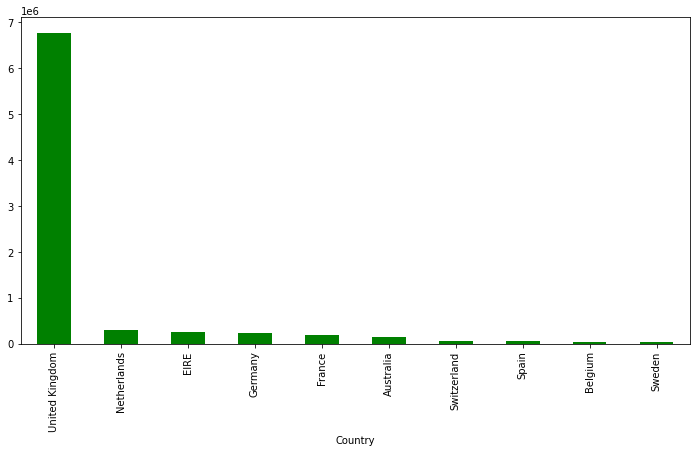

In [14]:
plt.figure(figsize=(12,6))
country_price[:10].plot(kind='bar',color='g')

<AxesSubplot:xlabel='Country'>

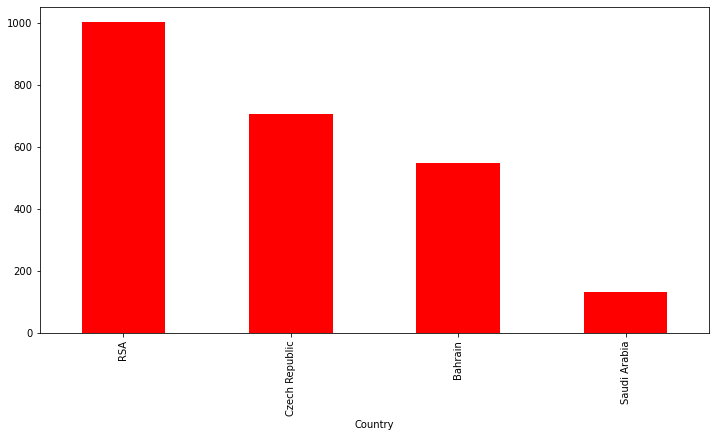

In [15]:
plt.figure(figsize=(12,6))
country_price[33:].plot(kind='bar',color='r')

In [16]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [17]:
# Adding year feature to the dataset 

timest = df['InvoiceDate'].dt.year

df['Year'] = timest

df.head()    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [18]:
# Adding month feature to the dataset 

timest = df['InvoiceDate'].dt.month

df['Month'] = timest

df.head()    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


<AxesSubplot:xlabel='Year'>

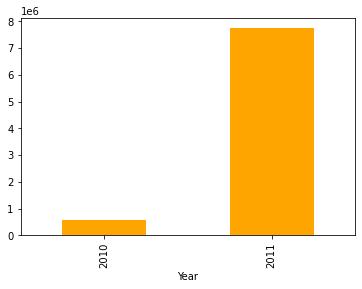

In [19]:
# Total sales for different years

df.groupby('Year')['total_sale'].sum().plot(kind = 'bar',color='orange')

<AxesSubplot:title={'center':'Sales month wise'}, xlabel='Month,Year'>

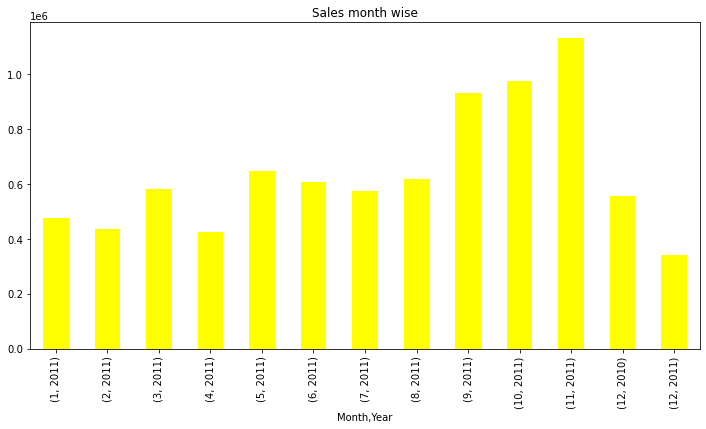

In [20]:
df['month_name'] = df['InvoiceDate'].dt.month_name() 
plt.figure(figsize=(12,6))
df.groupby(['Month','Year'])['total_sale'].sum().plot(kind = 'bar',color='yellow', title = 'Sales month wise')

In [21]:
# Checking why dec 2011 has a drop comparing to nov 2011
get_2011 = df[(df['Year'] == 2011)]
get_dec2011 = get_2011[(df['month_name'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6008\4032196094.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(df['month_name'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

Performance Analysis
Sales Performance can be seen with

Number of sales every month

Number of sales every year

We see that in 2010 we have sales only for dec and in 2011 we have sales for all months

We can see that from September to Novembor we have very good sales

We could see that DEC 2010 we have sales of 748957 and in DEC 2011 we have sales of 433668 which is a huge drop when analyzed further found out that We have only data upto 9th on dec 2011, so we find a sales drop in the month of dec 2011

In [22]:
#Countries with more number of customers
cus_id = pd.DataFrame(df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id.head()

,CustomerID
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533


<AxesSubplot:title={'center':'Most Customers for country'}, xlabel='Country'>

<Figure size 864x504 with 0 Axes>

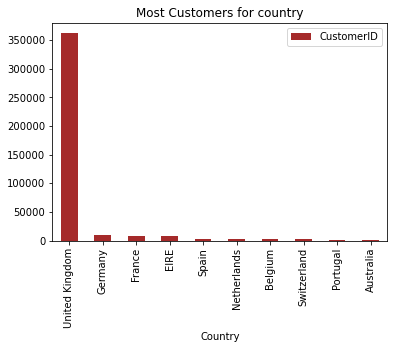

In [23]:
plt.figure(figsize=(12,7))
cus_id[:10].plot(kind = 'bar',color='brown', title = 'Most Customers for country')

<AxesSubplot:title={'center':'Least customers for country'}, xlabel='Country'>

<Figure size 864x432 with 0 Axes>

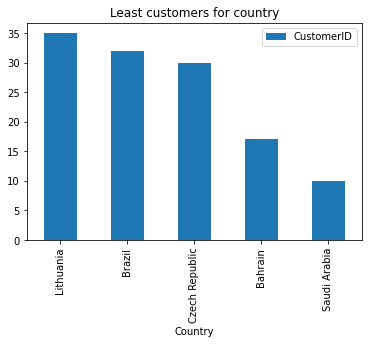

In [24]:
# Countries with less number of customers
plt.figure(figsize=(12,6))
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')


We see that september to december we have very high sales
We can concentrate on improving the sales for the other 8 months
We find very less number of customers in Lithania, Brazil, Czech Republic, Bahrain, Saudi Arabia
We have very less sales for Lebanon, Brazil, RSA, Bahrain, Saudi Arabia. We can concentrate on improving their sales
We could improve the business by increasing the customers and sales point of view

In [25]:
# Sales Average of each product

avg_sales = df.groupby(['StockCode','Description'])['Quantity','total_sale'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6008\4061705080.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = df.groupby(['StockCode','Description'])['Quantity','total_sale'].mean().sort_values(by = 'Quantity',ascending = False)


,,Quantity,total_sale
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


We can see the demand for each product

In [26]:
# NOW WE WILL USE RFM MODEL(RECENCY,FREQUENCY,MONETARY) BY WHICH WE WILL GEY THE DTAILS OF OUR CUSTOMER SPEND AND EXPENDITURE ON DIFFRENT PRODUCTS
# THEN WE WILL APPLY K-MEANS ALGORITHM TO SEGMENT OUR CUSTOMERS ON DIFFRENT BASISWHICH WILL HELP THE COMPANY
#TO KNOW MORE ABOUT CUSTOMER .

# RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.
We will create those 3 customer attributes for each customer.

Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [27]:
#last date available in our dataset
max_date=df['InvoiceDate'].max()

In [28]:
#create a new column called date which contains the date of invoice only
df['date'] = df['InvoiceDate'].dt.date

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,Year,Month,month_name,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01


In [30]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [31]:
# compute the diff
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,Year,Month,month_name,date,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December,2010-12-01,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December,2010-12-01,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,2010-12-01,373 days 04:24:00


In [32]:
# recency
last_purchase = df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [33]:
# number of days only
last_purchase['recency'] = last_purchase['diff'].dt.days
last_purchase.head()

,CustomerID,diff,recency
0,12346.0,325 days 02:33:00,325
1,12347.0,1 days 20:58:00,1
2,12348.0,74 days 23:37:00,74
3,12349.0,18 days 02:59:00,18
4,12350.0,309 days 20:49:00,309


In [34]:
#drop diff as we don't need it anymore
last_purchase.drop('diff',axis=1,inplace=True)

#Now we have the recency attribute created. e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.

Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer. 

In [35]:
# drop duplicates
df_copy = df
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


# Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [36]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'total_sale': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20
...,...,...
4367,18280.0,23.70
4368,18281.0,5.04
4369,18282.0,36.80
4370,18283.0,66.75


# CREATE RFM TABLE

In [37]:
# #merge recency dataframe with frequency dataframe
temp_df = last_purchase.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,recency,Frequency
0,12346.0,325,2
1,12347.0,1,7
2,12348.0,74,4
3,12349.0,18,1
4,12350.0,309,1


In [38]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,163.16
12348.0,74,4,331.36
12349.0,18,1,15.00
12350.0,309,1,25.20


In [39]:
rfm_df

,recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,163.16
12348.0,74,4,331.36
12349.0,18,1,15.00
12350.0,309,1,25.20
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,5.04
18282.0,7,3,36.80


Customer segments with RFM Model
Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says 80% of the results come from 20% of the causes.

Similarly, 20% customers contribute to 80% of your total revenue. Let's verify that because that will help us know which customers to focus on when marketing new products.

Applying 80-20 rule

In [40]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  659053.02


In [41]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,2,0.00,4195.0
12347.0,1,7,163.16,794.0
12348.0,74,4,331.36,397.0
12349.0,18,1,15.00,3306.5
12350.0,309,1,25.20,2703.0


# TOP CUSTOMERS

In [80]:
customers_rank.sort_values('Rank',ascending=True).head(50)

,recency,Frequency,Monetary,Rank
CustomerID,,,,
18102.0,0,62,38834.79,1.0
17949.0,0,52,25593.67,2.0
17450.0,7,55,20062.47,3.0
14646.0,1,77,18688.06,4.0
16013.0,3,54,15437.88,5.0
16333.0,7,22,14418.96,6.0
15769.0,6,29,10185.24,7.0
15749.0,234,4,8346.00,8.0
12901.0,8,36,8240.21,9.0


In [43]:
#get top 20% of the customers
top_20_cutoff = 4372 *20 /100
top_20_cutoff

874.4

In [44]:
#sum the monetary values over the customer with rank <=874
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 874]['Monetary'].sum()
revenueByTop20

715612.67

# Applying K-means clustering on RFM variables

# FEATURE CORRELATION

In [45]:
customers_rank.corr()

,recency,Frequency,Monetary,Rank
recency,1.000000,-0.259342,-0.097286,0.318058
Frequency,-0.259342,1.000000,0.416488,-0.392538
Monetary,-0.097286,0.416488,1.000000,-0.272376
Rank,0.318058,-0.392538,-0.272376,1.000000


<AxesSubplot:>

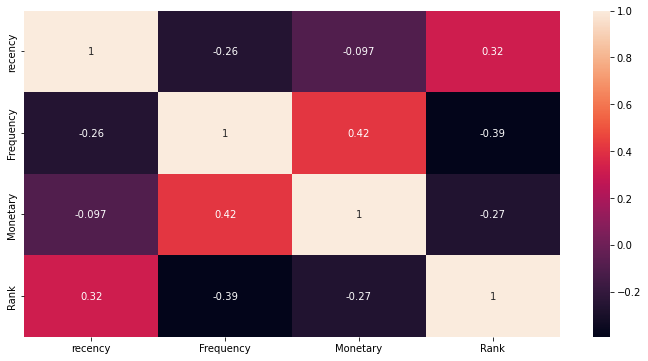

In [46]:
plt.figure(figsize=(12,6))
sn.heatmap(customers_rank.corr(),annot=True)

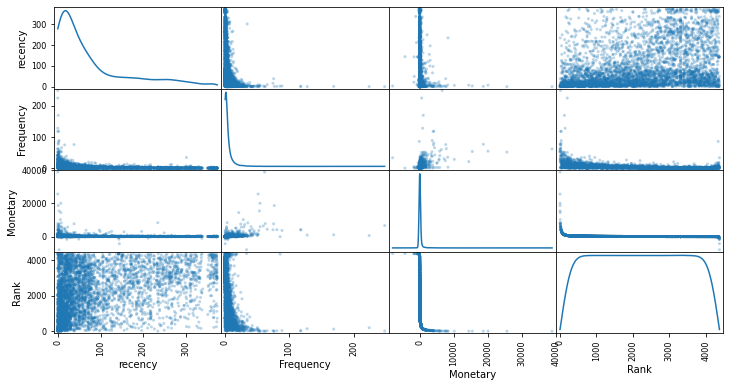

In [47]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(customers_rank, alpha = 0.3, figsize = (12,6), diagonal = 'kde');

In [48]:
# Scaling
from sklearn.preprocessing import MinMaxScaler 

In [49]:
scaled_df =pd.DataFrame(MinMaxScaler().fit_transform(customers_rank.to_numpy()),columns = customers_rank.columns)
scaled_df

,recency,Frequency,Monetary,Rank
0,0.871314,0.004049,0.169032,0.959506
1,0.002681,0.024291,0.172523,0.181423
2,0.198391,0.012146,0.176122,0.090597
3,0.048257,0.000000,0.169353,0.756234
4,0.828418,0.000000,0.169571,0.618165
...,...,...,...,...
4367,0.742627,0.000000,0.169539,0.629719
4368,0.482574,0.000000,0.169140,0.895333
4369,0.018767,0.008097,0.169819,0.516815
4370,0.008043,0.060729,0.170460,0.368794


Text(0.5, 1.0, 'Elbow curve')

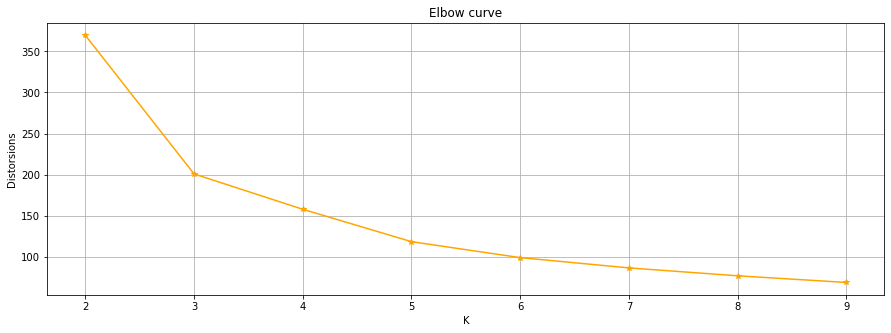

In [52]:
from sklearn.cluster import KMeans

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions,marker='*', c='orange')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4343152577234729
For n_clusters = 3 The average silhouette_score is : 0.47725208220629034
For n_clusters = 4 The average silhouette_score is : 0.4133859630078334
For n_clusters = 5 The average silhouette_score is : 0.43070061852912117
For n_clusters = 6 The average silhouette_score is : 0.4277005613701931
For n_clusters = 7 The average silhouette_score is : 0.38170319407267056
For n_clusters = 8 The average silhouette_score is : 0.3851459328043829
For n_clusters = 9 The average silhouette_score is : 0.39502511881286917


In [54]:
k_means=KMeans(n_clusters=5,random_state=10)
k_means.fit(scaled_df)

KMeans(n_clusters=5, random_state=10)

In [55]:
label1 = k_means.labels_
scaled_df['Cluster']=k_means.labels_

In [56]:
scaled_df

,recency,Frequency,Monetary,Rank,Cluster
0,0.871314,0.004049,0.169032,0.959506,1
1,0.002681,0.024291,0.172523,0.181423,3
2,0.198391,0.012146,0.176122,0.090597,3
3,0.048257,0.000000,0.169353,0.756234,4
4,0.828418,0.000000,0.169571,0.618165,1
...,...,...,...,...,...
4367,0.742627,0.000000,0.169539,0.629719,1
4368,0.482574,0.000000,0.169140,0.895333,1
4369,0.018767,0.008097,0.169819,0.516815,0
4370,0.008043,0.060729,0.170460,0.368794,0


In [57]:
label1

array([1, 3, 3, ..., 0, 0, 0])

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,Year,Month,month_name,date,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December,2010-12-01,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,December,2010-12-01,373 days 04:22:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,12,December,2010-12-01,373 days 04:16:00
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50,2010,12,December,2010-12-01,373 days 04:16:00
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,2010,12,December,2010-12-01,373 days 04:15:00


In [59]:
#copying data into another variable data
data=df.copy()

In [60]:
#taking customerid column to merge into our final_df table
a=data[['CustomerID']]

In [61]:
a=pd.DataFrame(a)

In [62]:
a

,CustomerID
0,17850.0
7,17850.0
9,13047.0
21,13047.0
25,13047.0
...,...
541865,13777.0
541867,13777.0
541869,15804.0
541890,13113.0


In [63]:
#droping duplicates of our customerid column
a.drop_duplicates(subset=['CustomerID'], keep="first", inplace=True)

In [64]:
a

,CustomerID
0,17850.0
9,13047.0
26,12583.0
46,13748.0
65,15100.0
...,...
536969,13436.0
537255,15520.0
538064,13298.0
538812,14569.0


In [65]:
#mereging customerid column
final_df = customers_rank.merge(a,on='CustomerID')

In [66]:
final_df

,CustomerID,recency,Frequency,Monetary,Rank
0,12346.0,325,2,0.00,4195.0
1,12347.0,1,7,163.16,794.0
2,12348.0,74,4,331.36,397.0
3,12349.0,18,1,15.00,3306.5
4,12350.0,309,1,25.20,2703.0
...,...,...,...,...,...
4367,18280.0,277,1,23.70,2753.5
4368,18281.0,180,1,5.04,3914.5
4369,18282.0,7,3,36.80,2260.0
4370,18283.0,3,16,66.75,1613.0


In [67]:
#assigning clusters in our final_df
final_df['clusters']=k_means.labels_

In [68]:
final_df

,CustomerID,recency,Frequency,Monetary,Rank,clusters
0,12346.0,325,2,0.00,4195.0,1
1,12347.0,1,7,163.16,794.0,3
2,12348.0,74,4,331.36,397.0,3
3,12349.0,18,1,15.00,3306.5,4
4,12350.0,309,1,25.20,2703.0,1
...,...,...,...,...,...,...
4367,18280.0,277,1,23.70,2753.5,1
4368,18281.0,180,1,5.04,3914.5,1
4369,18282.0,7,3,36.80,2260.0,0
4370,18283.0,3,16,66.75,1613.0,0


In [69]:
#we can see here our data is having 5 clusters
final_df.clusters.unique()

array([1, 3, 4, 2, 0])

In [81]:
final_df[final_df['clusters']==0].sort_values(by=['recency','Frequency','Monetary','Rank'],ascending=[True,False,False,True]).head(50)

,CustomerID,recency,Frequency,Monetary,Rank,clusters
1813,14796.0,0,27,54.57,1823.0,0
564,13081.0,0,21,74.20,1486.0,0
3290,16794.0,0,12,34.20,2372.0,0
3817,17528.0,0,11,63.79,1660.0,0
61,12423.0,0,9,70.53,1538.0,0
2640,15910.0,0,8,55.41,1800.0,0
1765,14730.0,0,8,41.95,2106.0,0
3359,16892.0,0,7,25.65,2666.5,0
3392,16933.0,0,5,45.97,2018.0,0
879,13510.0,0,5,44.38,2058.0,0


In [82]:
final_df[final_df['clusters']==1].sort_values(by=['recency','Frequency','Monetary','Rank'],ascending=[True,False,False,True]).head(50)

,CustomerID,recency,Frequency,Monetary,Rank,clusters
2210,15334.0,156,3,21.54,2831.0,1
2626,15889.0,156,2,22.25,2817.0,1
1473,14338.0,157,4,16.70,3150.0,1
2221,15349.0,157,2,18.40,3005.0,1
1103,13826.0,157,2,17.00,3130.5,1
4004,17781.0,158,2,15.70,3227.5,1
3515,17105.0,158,2,14.30,3389.0,1
1109,13833.0,158,1,15.90,3212.5,1
1955,15007.0,158,1,15.00,3306.5,1
4090,17899.0,158,1,13.68,3414.0,1


In [83]:
final_df[final_df['clusters']==2].sort_values(by=['recency','Frequency','Monetary','Rank'],ascending=[True,False,False,True]).head(50)

,CustomerID,recency,Frequency,Monetary,Rank,clusters
3937,17692.0,126,5,82.68,1365.0,2
2058,15133.0,127,3,96.56,1219.0,2
2240,15374.0,128,1,91.80,1265.5,2
2143,15245.0,133,3,80.00,1404.0,2
2238,15372.0,136,1,88.80,1300.0,2
342,12763.0,137,2,102.30,1153.5,2
3465,17040.0,137,1,175.20,744.0,2
446,12916.0,138,5,176.90,735.0,2
3401,16948.0,138,3,75.00,1475.0,2
2487,15704.0,139,4,91.80,1265.5,2


In [73]:
final_df[final_df['clusters']==3].sort_values(by=['recency','Frequency','Monetary','Rank'],ascending=[True,False,False,True]).head(100)


,CustomerID,recency,Frequency,Monetary,Rank,clusters
1895,14911.0,0,248,6614.09,14.0,3
330,12748.0,0,224,627.16,199.0,3
1674,14606.0,0,128,892.97,141.0,3
2192,15311.0,0,118,3973.29,30.0,3
1078,13798.0,0,63,7831.76,10.0,3
...,...,...,...,...,...,...
1252,14032.0,1,18,540.42,241.0,3
1063,13769.0,1,16,258.09,501.0,3
1329,14135.0,1,15,803.05,162.0,3
1054,13756.0,1,15,708.92,180.0,3


In [84]:
final_df[final_df['clusters']==4].sort_values(by=['recency','Frequency','Monetary','Rank'],ascending=[True,False,False,True]).head(50)


,CustomerID,recency,Frequency,Monetary,Rank,clusters
2562,15804.0,0,19,-128.70,4345.0,4
1548,14441.0,0,10,-52.55,4331.0,4
1146,13883.0,0,9,11.50,3543.5,4
3815,17526.0,0,8,-286.00,4355.0,4
3723,17405.0,0,5,17.46,3079.0,4
995,13680.0,0,5,-174.15,4349.0,4
2666,15951.0,0,3,12.05,3507.5,4
889,13521.0,0,3,11.16,3553.0,4
3033,16446.0,0,3,1.65,4127.0,4
2937,16322.0,0,2,17.50,3077.0,4


In [75]:
final_df.clusters.value_counts()

3    1231
0    1142
4     948
1     684
2     367
Name: clusters, dtype: int64